# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [1]:
# <div class="product-list-item"></div

### What is the tag name and class name for the old price? The new price?

In [2]:
# <span class="old-price"></span>
# <span class="price"></span>

### What is the tag name and class name for the link to the product page?

In [3]:
# <a class="product-url js-product-tracking"></a>

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [4]:
import requests
from bs4 import BeautifulSoup

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [5]:
# html_hm = urlopen("http://www.hm.com/us/products/sale").read()
# soup_doc = BeautifulSoup(html_hm, "html.parser")
# print(soup_doc.prettify())

url_hm = "http://www.hm.com/us/products/sale"
response_hm = requests.get(url_hm)
doc_hm = BeautifulSoup(response_hm.text, "html.parser")
doc_hm


<!DOCTYPE html>

<html class="no-js">
<head>
<!-- josh start -->
<meta content="width=device-width,initial-scale=1,maximum-scale=1.0,user-scalable=no" name="viewport"/>
<title>SALE | H&amp;M; US</title>
<meta content="SALE" property="og:title"/>
<link href="//s1-cdn.hm.com/global/hm-pattern-lib/5.11.4/images/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<!-- josh end -->
<script type="text/javascript">
    var hm = hm || {};
    hm.api = hm.api || {};
    hm.moduleConfig = hm.moduleConfig || {};
    hm.moduleConfig.locale = 'en_US';
    hm.moduleConfig.api = hm.moduleConfig.api || {};
    hm.moduleConfig.status = hm.moduleConfig.status || {};
    hm.i18n = {"hm.label.from":"From","hm.productlist.headline":"Shop the items","hm.label.description":"Description ","hm.label.club":"CLUB","hm.campaign.store.locator.departments":"Departments","hm.campaign.view.products":"View Products","hm.label.countdown.days.left":"more days left","hm.shopnow.view.details":"View details","hm.label.

In [6]:
doc_hm.find_all('div', attrs = {'class':'product-list-item'})

[]

## URLs

### What is the URL for data about on-sale men's clothing?

In [7]:
url_men = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'

### What is the URL for data about on-sale women's clothing?

In [8]:
url_women = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'

### What is the URL for data about on-sale women's tops?

In [9]:
url_tops = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'

### What changes about the url based on what you're looking for?

In [10]:
# %2Fladies%2Ftops

## Request on-sale women's tops.

### How many results do you get?

In [11]:
response_tops = requests.get(url_tops)
data_tops = response_tops.json()
tops = data_tops['displayArticles']
tops

[{'activityArticleNumber': '052683',
  'additionalImages': [],
  'articleCode': '47468-E',
  'assortmentState': 'CURRENT',
  'availableSizeInfo': [{'sizeName': 'XS', 'stockSize': '003'},
   {'sizeName': 'S', 'stockSize': '004'},
   {'sizeName': 'M', 'stockSize': '005'},
   {'sizeName': 'L', 'stockSize': '006'}],
  'availableSwatches': [{'articleCode': '47468-E',
    'castorArticleId': '0372097010',
    'colour': 'f24e32',
    'fabricImageResource': '/fabric/2016/3F9DDCC4-23B1-4A18-89C2-451C25535DE7.jpg',
    'fabricUrl': '//lp.hm.com/hmprod?set=source[/fabric/2016/3F9DDCC4-23B1-4A18-89C2-451C25535DE7.jpg]&call=url[file:/mobile/v1/fabric/sprite]'}],
  'castorArticleNumber': '010',
  'castorProductNumber': '0372097',
  'colourDescription': 'Powder beige',
  'departments': [{'code': 'LADIES',
    'name': 'NAVIGATION.LABEL.DEPARTMENT.LADIES',
    'paths': ['LADIES/LADIES_MODERNCLASSICS/LADIES_MODERNCLASSICS_TOPS',
     'LADIES/LADIES_TOPS/LADIES_TOPS_VESTS_SLEEVELESS']}],
  'name': 'Beaded

In [12]:
tops_on_sale = []
for a_top in tops:
    price = a_top['priceInfo']
    if price['onSale'] == True:
        tops_on_sale.append(a_top)
#print(tops_on_sale)
print(len(tops_on_sale))

60


### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [13]:
print(len(tops))

60


In [14]:
#1 Change page size to 400
# from url_tops = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'
# to url_tops = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=400&page=1&deviceType=DESKTOP'

In [15]:
#2 For loop to go through all pages with a page size of 60.

url_tops = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP'

for i in range(1,15):
    urls_tops = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=' + str(i) + '&deviceType=DESKTOP'
    print(urls_tops)

http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP
http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=2&deviceType=DESKTOP
http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=3&deviceType=DESKTOP
http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=4&deviceType=DESKTOP
http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=5&deviceType=DESKTOP
http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=6&deviceType=DESKTOP
http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=7&deviceType=DESKTOP
http://api.hm.com/v2/us/en/products/displ

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [16]:
tops[0]

{'activityArticleNumber': '052683',
 'additionalImages': [],
 'articleCode': '47468-E',
 'assortmentState': 'CURRENT',
 'availableSizeInfo': [{'sizeName': 'XS', 'stockSize': '003'},
  {'sizeName': 'S', 'stockSize': '004'},
  {'sizeName': 'M', 'stockSize': '005'},
  {'sizeName': 'L', 'stockSize': '006'}],
 'availableSwatches': [{'articleCode': '47468-E',
   'castorArticleId': '0372097010',
   'colour': 'f24e32',
   'fabricImageResource': '/fabric/2016/3F9DDCC4-23B1-4A18-89C2-451C25535DE7.jpg',
   'fabricUrl': '//lp.hm.com/hmprod?set=source[/fabric/2016/3F9DDCC4-23B1-4A18-89C2-451C25535DE7.jpg]&call=url[file:/mobile/v1/fabric/sprite]'}],
 'castorArticleNumber': '010',
 'castorProductNumber': '0372097',
 'colourDescription': 'Powder beige',
 'departments': [{'code': 'LADIES',
   'name': 'NAVIGATION.LABEL.DEPARTMENT.LADIES',
   'paths': ['LADIES/LADIES_MODERNCLASSICS/LADIES_MODERNCLASSICS_TOPS',
    'LADIES/LADIES_TOPS/LADIES_TOPS_VESTS_SLEEVELESS']}],
 'name': 'Beaded Camisole Top',
 'pri

In [17]:
all_tops_dict_list = []

for i in range(1,15):
    urls_tops = 'http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=' + str(i) + '&deviceType=DESKTOP'
    response_all_tops = requests.get(urls_tops)
    data_all_tops = response_all_tops.json()
    all_tops = data_all_tops['displayArticles']
    for one_top in all_tops:
        price = one_top['priceInfo']
        all_tops_dict = {}
        if price['onSale'] == True:
            all_tops_dict['Name'] = one_top['name']
            all_tops_dict['Product_code-number'] = one_top['castorProductNumber']
            all_tops_dict['Old_price'] = price['formattedOldPrice']
            all_tops_dict['On-sale_price'] = price['formattedPrice']
            all_tops_dict['Item\'s_URL'] = one_top['webUrl']
            #print(all_tops_dict)
            all_tops_dict_list.append(all_tops_dict)

#print(all_tops_dict_list[0])
#print(len(all_tops_dict_list))

In [18]:
import pandas as pd
%matplotlib inline

In [19]:
df = pd.DataFrame(all_tops_dict_list)
df

,Item's_URL,Name,Old_price,On-sale_price,Product_code-number
0,http://www.hm.com/us/product/47468?article=474...,Beaded Camisole Top,$17.99,$7.99,0372097
1,http://www.hm.com/us/product/69690?article=696...,V-neck Top,$17.99,$7.99,0506679
2,http://www.hm.com/us/product/69690?article=696...,V-neck Top,$17.99,$7.99,0506679
3,http://www.hm.com/us/product/61712?article=617...,Draped Top,$19.99,$9.99,0461815
4,http://www.hm.com/us/product/64062?article=640...,Long-sleeved Jersey Top,$24.99,$19.99,0474209
5,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,$24.99,$14.99,0437548
6,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,$24.99,$12.99,0437548
7,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,$24.99,$14.99,0437548
8,http://www.hm.com/us/product/46245?article=462...,Jersey Camisole Top,$4.99,$3.99,0377266
9,http://www.hm.com/us/product/49881?article=498...,One-shoulder Top,$12.99,$5.99,0422989


In [20]:
df.to_csv('HM_sales.csv', index = False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [21]:
df_HM = pd.read_csv('HM_sales.csv')
df_HM

,Item's_URL,Name,Old_price,On-sale_price,Product_code-number
0,http://www.hm.com/us/product/47468?article=474...,Beaded Camisole Top,$17.99,$7.99,372097
1,http://www.hm.com/us/product/69690?article=696...,V-neck Top,$17.99,$7.99,506679
2,http://www.hm.com/us/product/69690?article=696...,V-neck Top,$17.99,$7.99,506679
3,http://www.hm.com/us/product/61712?article=617...,Draped Top,$19.99,$9.99,461815
4,http://www.hm.com/us/product/64062?article=640...,Long-sleeved Jersey Top,$24.99,$19.99,474209
5,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,$24.99,$14.99,437548
6,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,$24.99,$12.99,437548
7,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,$24.99,$14.99,437548
8,http://www.hm.com/us/product/46245?article=462...,Jersey Camisole Top,$4.99,$3.99,377266
9,http://www.hm.com/us/product/49881?article=498...,One-shoulder Top,$12.99,$5.99,422989


### Convert the prices to numbers, if you haven't already

In [22]:
df_HM['Old_price'] = df_HM['Old_price'].str.replace('$','')
df_HM['On-sale_price'] = df_HM['On-sale_price'].str.replace('$','')

df_HM['Old_price'] = df_HM['Old_price'].astype(float)
df_HM['On-sale_price'] = df_HM['On-sale_price'].astype(float)
df_HM

,Item's_URL,Name,Old_price,On-sale_price,Product_code-number
0,http://www.hm.com/us/product/47468?article=474...,Beaded Camisole Top,17.99,7.99,372097
1,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679
2,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679
3,http://www.hm.com/us/product/61712?article=617...,Draped Top,19.99,9.99,461815
4,http://www.hm.com/us/product/64062?article=640...,Long-sleeved Jersey Top,24.99,19.99,474209
5,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548
6,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,12.99,437548
7,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548
8,http://www.hm.com/us/product/46245?article=462...,Jersey Camisole Top,4.99,3.99,377266
9,http://www.hm.com/us/product/49881?article=498...,One-shoulder Top,12.99,5.99,422989


### What is the average on-sale price of a women's top? Make a histogram, too, please.

In [23]:
df_HM['On-sale_price'].mean()

11.220249307479223

### What is the average discount between full price and on sale? Histogram too, please.

In [24]:
df_HM['Discount'] = df_HM['Old_price'] - df_HM['On-sale_price']
df_HM

,Item's_URL,Name,Old_price,On-sale_price,Product_code-number,Discount
0,http://www.hm.com/us/product/47468?article=474...,Beaded Camisole Top,17.99,7.99,372097,10.00
1,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00
2,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00
3,http://www.hm.com/us/product/61712?article=617...,Draped Top,19.99,9.99,461815,10.00
4,http://www.hm.com/us/product/64062?article=640...,Long-sleeved Jersey Top,24.99,19.99,474209,5.00
5,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00
6,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,12.99,437548,12.00
7,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00
8,http://www.hm.com/us/product/46245?article=462...,Jersey Camisole Top,4.99,3.99,377266,1.00
9,http://www.hm.com/us/product/49881?article=498...,One-shoulder Top,12.99,5.99,422989,7.00


In [25]:
df_HM['Discount'].mean()

8.5698614958448758

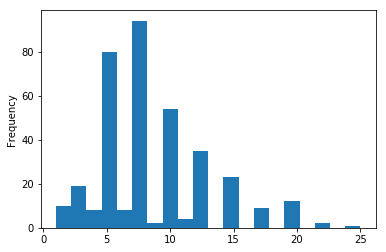

In [26]:
df_HM['Discount'].plot(kind='hist', bins=20)

### What is the average discount as a percentage of the full price? Histogram too, please.

In [27]:
df_HM['Discount %'] = ((df_HM['Old_price']/df_HM['On-sale_price'])-1)*100
df_HM

,Item's_URL,Name,Old_price,On-sale_price,Product_code-number,Discount,Discount %
0,http://www.hm.com/us/product/47468?article=474...,Beaded Camisole Top,17.99,7.99,372097,10.00,125.156446
1,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00,125.156446
2,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00,125.156446
3,http://www.hm.com/us/product/61712?article=617...,Draped Top,19.99,9.99,461815,10.00,100.100100
4,http://www.hm.com/us/product/64062?article=640...,Long-sleeved Jersey Top,24.99,19.99,474209,5.00,25.012506
5,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00,66.711141
6,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,12.99,437548,12.00,92.378753
7,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00,66.711141
8,http://www.hm.com/us/product/46245?article=462...,Jersey Camisole Top,4.99,3.99,377266,1.00,25.062657
9,http://www.hm.com/us/product/49881?article=498...,One-shoulder Top,12.99,5.99,422989,7.00,116.861436


In [28]:
df_HM['Discount %'].mean()

79.46264599356563

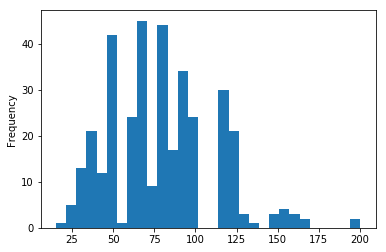

In [29]:
df_HM['Discount %'].plot(kind='hist', bins=30)

## Shopping the sales

### How many items are over 50% off?


In [30]:
df_HM[df_HM['Discount %'] >= 50].shape

(309, 7)

### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [31]:
df_HM_big_sales = df_HM[df_HM['Discount %'] >= 50]
df_HM_big_sales

,Item's_URL,Name,Old_price,On-sale_price,Product_code-number,Discount,Discount %
0,http://www.hm.com/us/product/47468?article=474...,Beaded Camisole Top,17.99,7.99,372097,10.00,125.156446
1,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00,125.156446
2,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00,125.156446
3,http://www.hm.com/us/product/61712?article=617...,Draped Top,19.99,9.99,461815,10.00,100.100100
5,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00,66.711141
6,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,12.99,437548,12.00,92.378753
7,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00,66.711141
9,http://www.hm.com/us/product/49881?article=498...,One-shoulder Top,12.99,5.99,422989,7.00,116.861436
14,http://www.hm.com/us/product/63545?article=635...,Short Lace Top,29.99,14.99,478283,15.00,100.066711
17,http://www.hm.com/us/product/59539?article=595...,Glittery Bustier,24.99,12.99,438641,12.00,92.378753


In [32]:
pd.options.display.max_rows

60

In [33]:
pd.options.display.max_rows = 200
pd.options.display.max_rows

200

In [34]:
df_HM_big_sales

,Item's_URL,Name,Old_price,On-sale_price,Product_code-number,Discount,Discount %
0,http://www.hm.com/us/product/47468?article=474...,Beaded Camisole Top,17.99,7.99,372097,10.00,125.156446
1,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00,125.156446
2,http://www.hm.com/us/product/69690?article=696...,V-neck Top,17.99,7.99,506679,10.00,125.156446
3,http://www.hm.com/us/product/61712?article=617...,Draped Top,19.99,9.99,461815,10.00,100.100100
5,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00,66.711141
6,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,12.99,437548,12.00,92.378753
7,http://www.hm.com/us/product/56522?article=565...,Long-sleeved Top,24.99,14.99,437548,10.00,66.711141
9,http://www.hm.com/us/product/49881?article=498...,One-shoulder Top,12.99,5.99,422989,7.00,116.861436
14,http://www.hm.com/us/product/63545?article=635...,Short Lace Top,29.99,14.99,478283,15.00,100.066711
17,http://www.hm.com/us/product/59539?article=595...,Glittery Bustier,24.99,12.99,438641,12.00,92.378753
